In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# check for duplicateds in the data
sum(df.duplicated())

0

In [8]:
# overview statistics of dataset
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


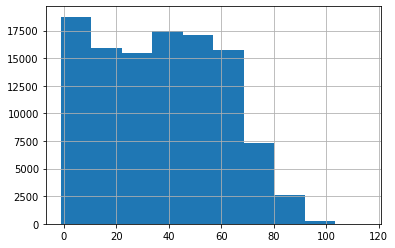

In [9]:
# age histogram
df['Age'].hist()

In [10]:
# count values in No-show column
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
# count Male &  Female
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [12]:
# count percentage in No-show
NoShow = df['No-show']
counts = NoShow.value_counts()
percent = NoShow.value_counts(normalize=True)
pd.DataFrame({'counts': counts, 'percent' : percent})

,counts,percent
No,88208,0.798067
Yes,22319,0.201933


In [13]:
# count percentage in Gender
F = df.Gender
counts = F.value_counts()
percent = F.value_counts(normalize=True)
pd.DataFrame({'counts': counts, 'percent' : percent})

,counts,percent
F,71840,0.649977
M,38687,0.350023


In [15]:
# count percentage of No-show group by Gender
pd.crosstab(df['Gender'],df['No-show']).apply(lambda r: r/r.sum(), axis=1)

No-show,No,Yes
Gender,,
F,0.796854,0.203146
M,0.800321,0.199679


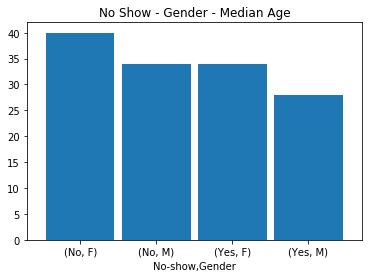

In [17]:
# Median age per group
df.groupby(["No-show","Gender"]).Age.median().plot(kind="bar",
                                                 title =  "No Show - Gender - Median Age",
                                                 rot = 0, width = 0.9);

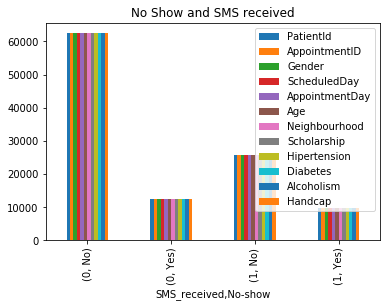

In [21]:
# Relationship between No-show – SMS_received
df.groupby(["SMS_received","No-show"]).count().plot(kind="bar",title="No Show and SMS received")

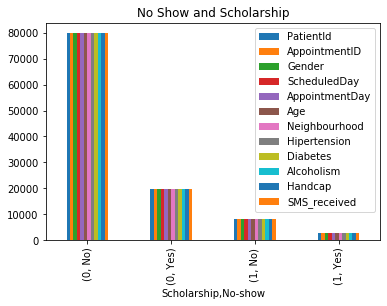

In [22]:
# Relationship between No-show and Scholarship
df.groupby(["Scholarship","No-show"]).count().plot(kind="bar",title="No Show and Scholarship")

In [23]:
# count percentage No show - scholarship
pd.crosstab(df['No-show'],df['Scholarship']).apply(lambda r: r/r.sum(), axis=1)

Scholarship,0,1
No-show,,
No,0.906097,0.093903
Yes,0.884493,0.115507


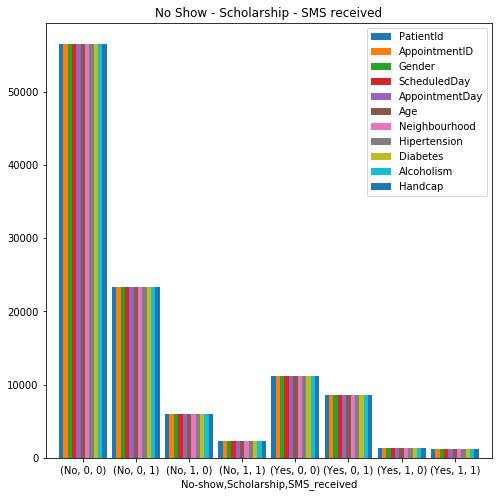

In [24]:
# No Show and Scholarship - SMS received
df.groupby(["No-show","Scholarship","SMS_received"]).count().plot(kind="bar",
                                                 title =  "No Show - Scholarship - SMS received",
                                                 rot = 0, width = 0.9,figsize=(8,8));

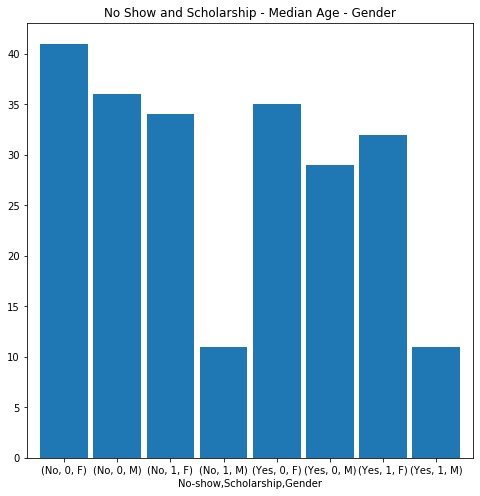

In [27]:
# No Show and Scholarship - Median Age - Gender
df.groupby(["No-show","Scholarship","Gender"]).Age.median().plot(kind="bar",
                                                 title =  "No Show and Scholarship - Median Age - Gender",
                                                 rot = 0, width = 0.9,figsize=(8,8));

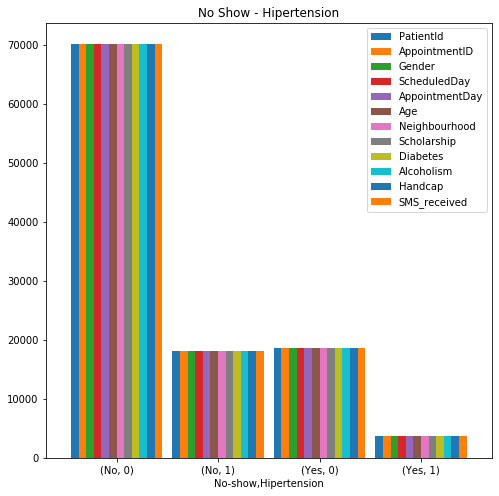

In [28]:
# No Show and Hipertension
df.groupby(["No-show","Hipertension"]).count().plot(kind="bar",
                                                 title =  "No Show - Hipertension",
                                                 rot = 0, width = 0.9,figsize=(8,8));